In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install keras
!pip install tensorflow

In [15]:
import keras

In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data('MNIST-data-%d')

In [17]:
import matplotlib.pyplot as plt

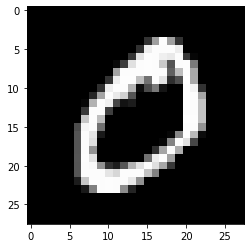

In [18]:
plt.imshow(x_train[1], cmap='gray')
plt.show()

In [59]:
def layer1(row, r):
    curr_r = 0
    new_row = []
    for i in range((len(row) * r)):
        if curr_r > 0:
            curr_r -= 1
            new_row.append(0)
        elif row[i // r] > 0:
            curr_r = r
            new_row.append(1)
        else:
            new_row.append(0)
    return new_row

In [60]:
def izhikevich(middle_spikes):
    return np.mean(np.array(middle_spikes), axis=0)

In [61]:
def layer_2(spike_trains, n, m, k):
    middle_spikes = []
    for i in range(n // k):
        pre_spikes = []
        for j in range(k):
            pre_spikes.append(spike_trains[i * k + j])
        # Merge K Spike Trains
        middle_spikes.append(izhikevich(pre_spikes))
    return middle_spikes
            

In [62]:
def stdp():
    pass

In [63]:
def inhibition():
    pass

In [64]:
def update_weights():
    pass

In [65]:
def one_pass_data_training(image, weights=0):
    (n, m) = image.shape
    # Refractory Period
    r = 2
    # Layer 1
    spike_trains = []
    for row in image:
        spike_train = layer1(row, r)
        spike_trains.append(spike_train)
    # Layer 2
    middle_spike_trains = layer_2(spike_trains, n, m, 2)
    #print(middle_spike_trains)
    # Layer 3
    output = izhikevich(middle_spike_trains)
    stdp()
    inhibition()
    update_weights()
    print(output)
    

In [66]:
one_pass_data_training(x_train[1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.28571429 0.         0.14285714 0.28571429 0.03571429 0.14285714
 0.21428571 0.03571429 0.14285714 0.14285714 0.10714286 0.10714286
 0.14285714 0.10714286 0.14285714 0.14285714 0.10714286 0.07142857
 0.17857143 0.10714286 0.10714286 0.17857143 0.14285714 0.10714286
 0.14285714 0.14285714 0.10714286 0.07142857 0.32142857 0.07142857
 0.03571429 0.32142857 0.         0.03571429 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
